# Performing Decision Tree and Dimensionality reduction on 'cardekho' dataset

## Column description

1. **Car_Name**: The model or name of the car.
2. **Year**: The year when the car was purchased or manufactured.
3. **Selling_Price**: The price at which the car is currently being sold (in lakhs of INR).
4. **Present_Price**: The current market value of the car (in lakhs of INR).
5. **Kms_Driven**: The total kilometers the car has been driven.
6. **Fuel_Type**: The type of fuel used by the car, such as Petrol, Diesel, or CNG.
7. **Seller_Type**: The category of the seller, either Dealer or Individual.
8. **Transmission**: The transmission type of the car, either Manual or Automatic.
9. **Owner**: The number of previous owners of the car.

## Import Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import dataset

In [2]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\cardekho.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## Exploratory Data Analysis

### Check shape of dataset

In [3]:
df.shape

(301, 9)

### Preview dataset

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### View summary of dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Checking null values

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Visualization of the data

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>],
       [<Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Kms_Driven'}>],
       [<Axes: title={'center': 'Owner'}>, <Axes: >]], dtype=object)

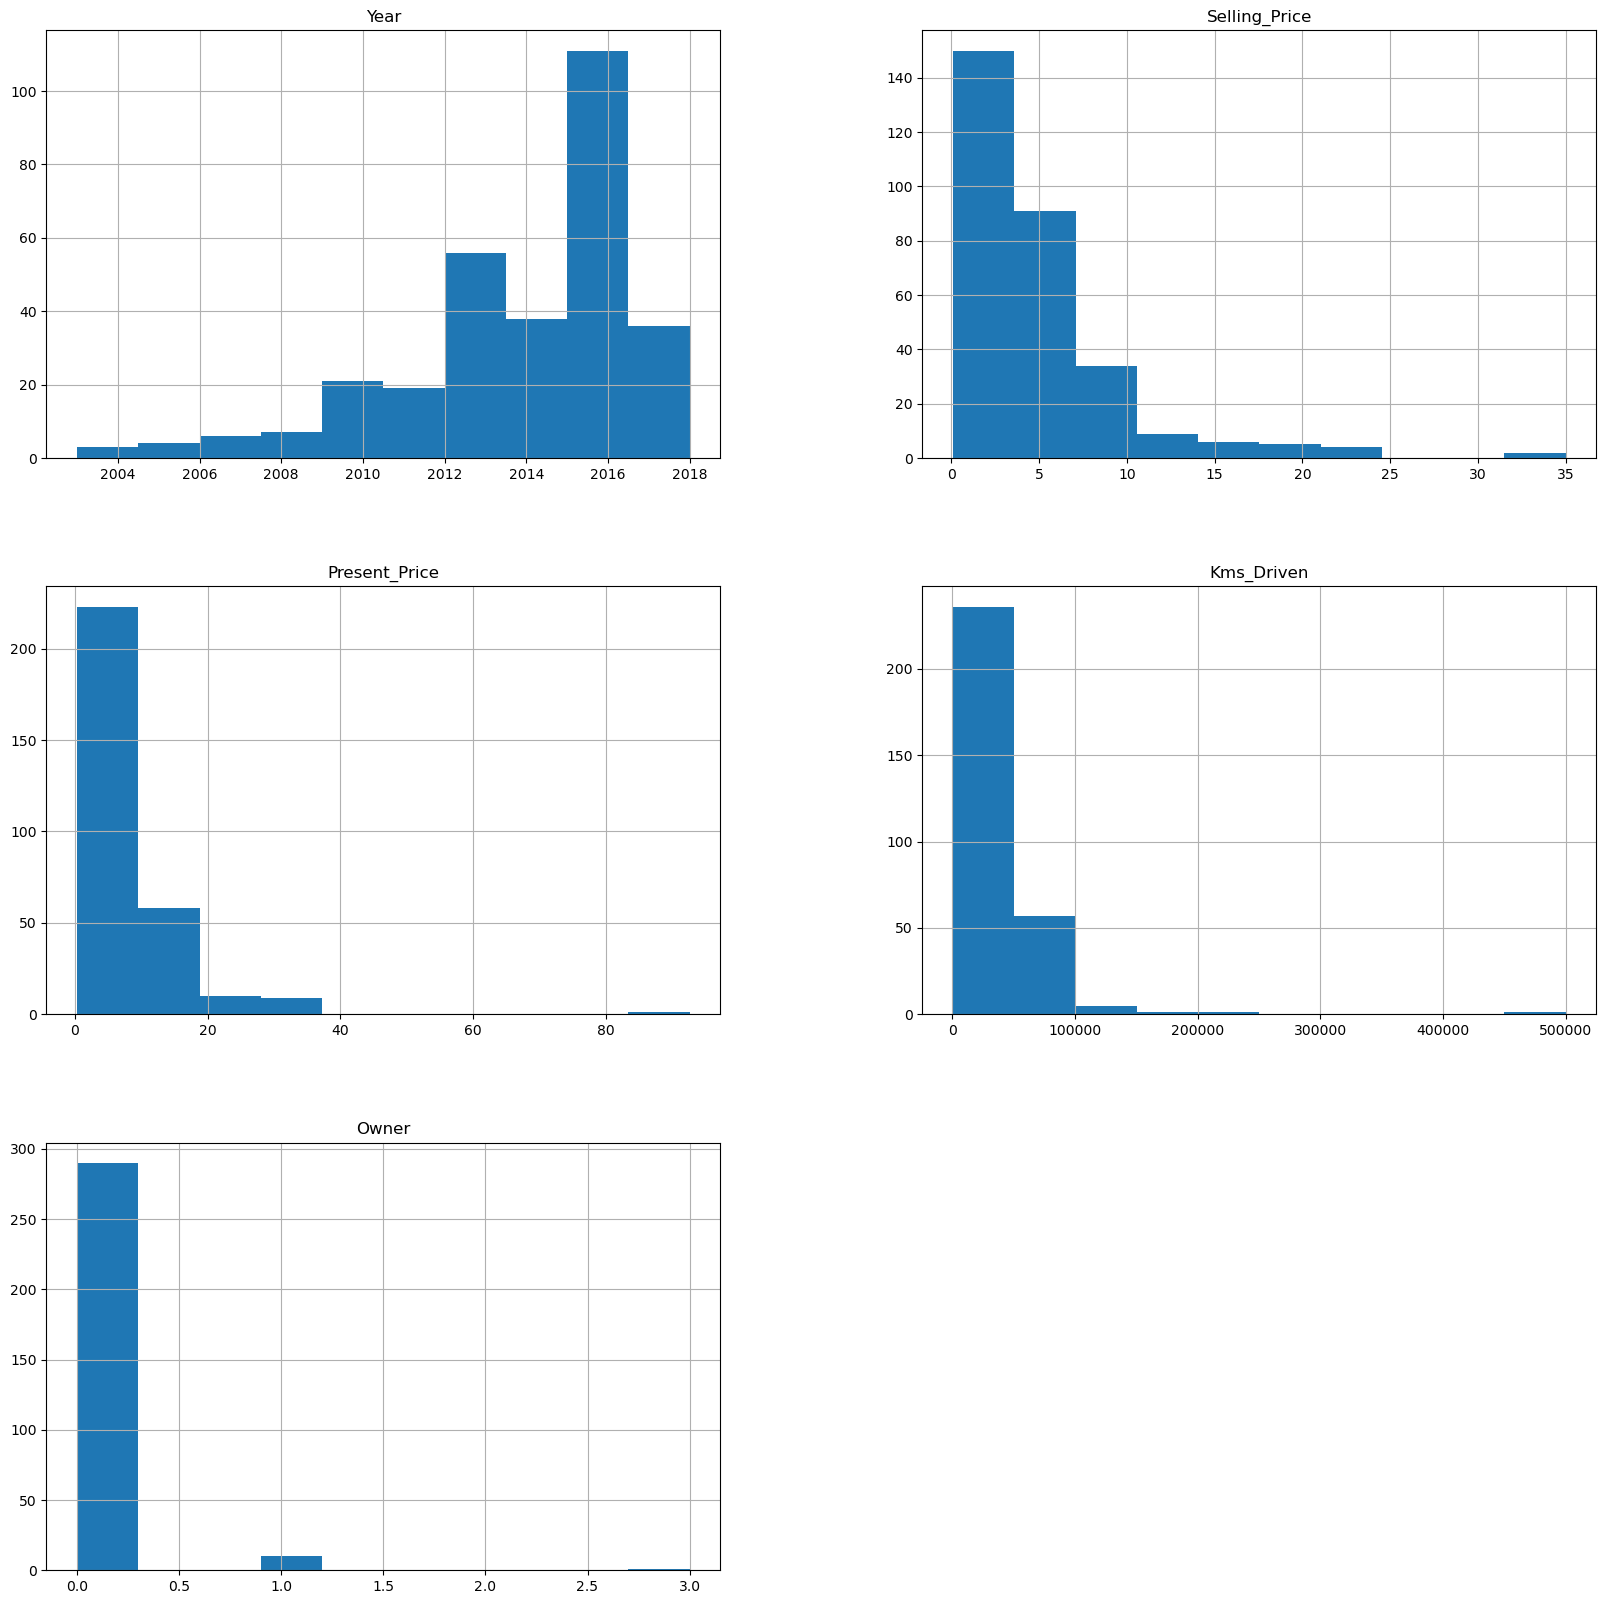

In [7]:
df.hist(figsize = (20,20))

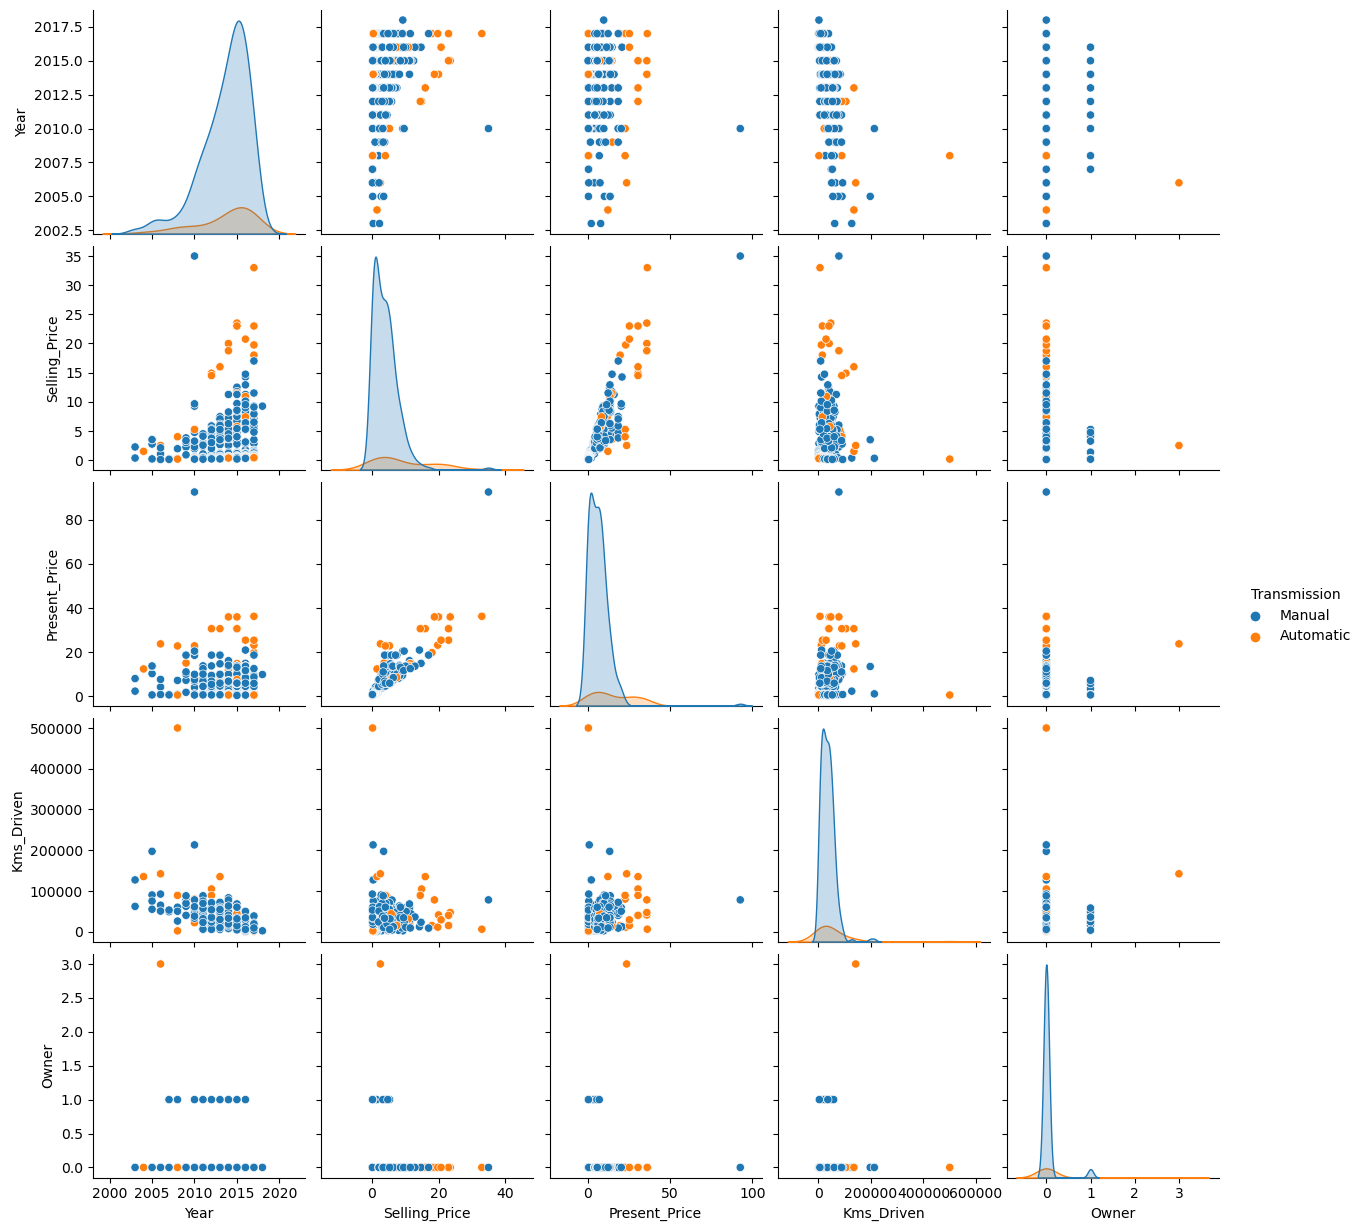

In [8]:
sns.pairplot(df, hue='Transmission')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14340\2733851626.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


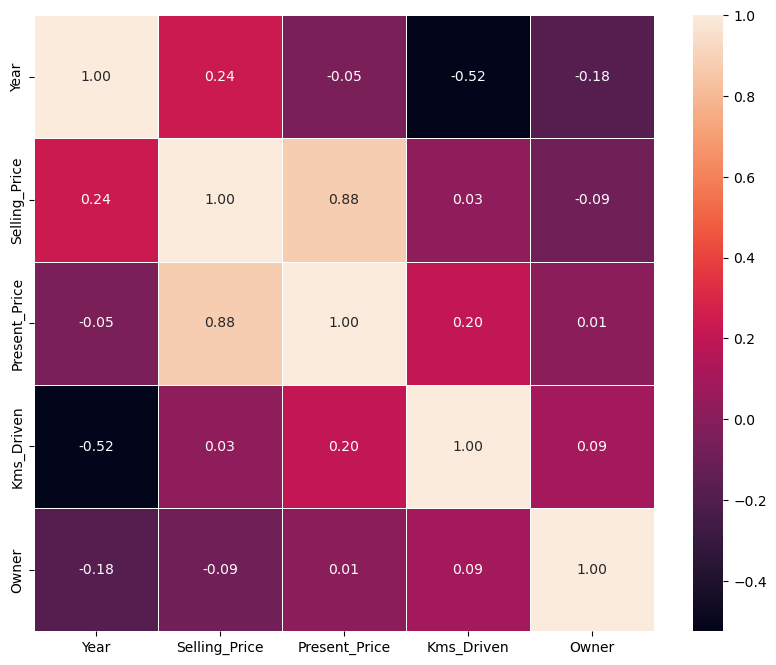

In [10]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.show()

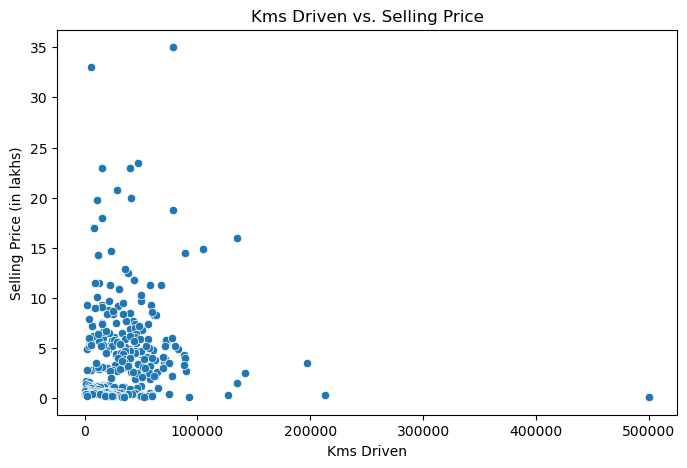

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=df)
plt.title('Kms Driven vs. Selling Price')
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price (in lakhs)')
plt.show()

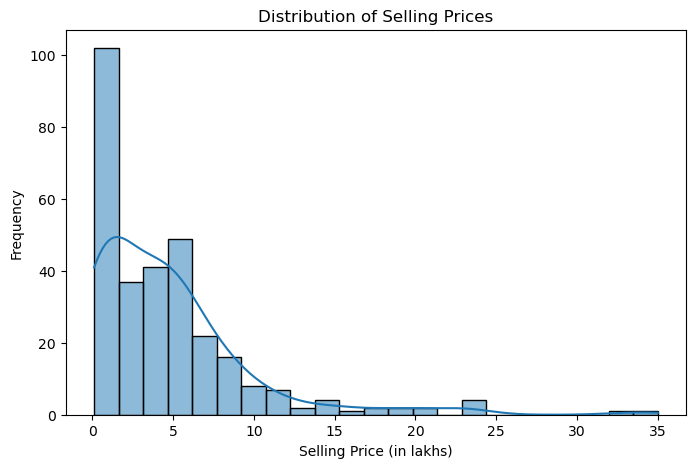

In [11]:
# Distribution of Selling Prices
plt.figure(figsize=(8, 5))
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price (in lakhs)')
plt.ylabel('Frequency')
plt.show()

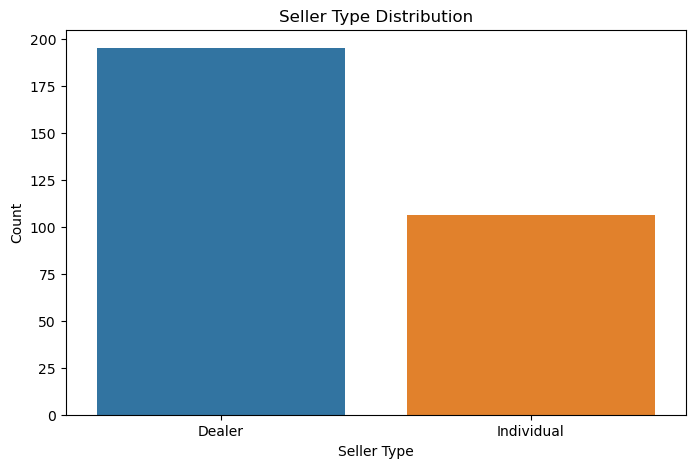

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Seller_Type', data=df)
plt.title('Seller Type Distribution')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.show()

## Applying label encoder to turn categorical columns to numerical

In [14]:
from sklearn.preprocessing import LabelEncoder

# Copy the original data
data_encoded = df.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission']

# Apply label encoding to each categorical column
for column in categorical_columns:
    data_encoded[column] = label_encoder.fit_transform(data_encoded[column])

# Display the first few rows of the encoded dataset
print(data_encoded.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          2   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          2   
3  wagon r  2011           2.85           4.15        5200          2   
4    swift  2014           4.60           6.87       42450          1   

   Seller_Type  Transmission  Owner  
0            0             1      0  
1            0             1      0  
2            0             1      0  
3            0             1      0  
4            0             1      0  


### Setting feature vector and target variable

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [16]:
X = data_encoded[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
y = data_encoded['Selling_Price']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dpred = dtr.predict(X_test)
mse = mean_squared_error(y_test, dpred)
mae = mean_absolute_error(y_test, dpred)
print(f'The Mean Squared Error is: {mse}\nThe Mean Absolute Error is: {mae}')

The Mean Squared Error is: 2.0220081967213117
The Mean Absolute Error is: 0.850983606557377


In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

# Display the explained variance ratio for each principal component
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Explained Variance Ratio: [9.99999952e-01 4.46490568e-08 3.49757324e-09 1.09872556e-10
 7.28784676e-11 5.14009582e-11 3.85621711e-11]


In [20]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 7


## Conclusion

- **Dataset Composition**: Contains 301 records and 9 columns with details on used cars, including model names, prices, specifications, and ownership history.
- **Target Variable**: `Selling_Price`, crucial for predicting car prices.
- **Key Features**: 
  - **Present_Price** and **Kms_Driven** significantly impact selling price.
  - Categorical features like **Fuel_Type**, **Seller_Type**, and **Transmission** offer insights into market demand.
- **Data Quality**: Clean with no missing values; categorical variables need encoding.
- **Applications**: Useful for predictive modeling, market segmentation, and pricing trend analysis.
- **Limitations**: Lacks geographic data and details on car condition, maintenance, or accident history.